In [1]:
!pwd

/mnt/c/Users/agarc/Bootcamp_IronHack/Proyectos/P5_Diamonds


In [2]:
!ls

README.md	diamonds-datamad0121.zip  test.csv
Untitled.ipynb	sample_submission.csv	  train.csv


## Libraries

In [10]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

## Cleaning dataset

In [4]:
df = pd.read_csv("train.csv")

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40455 entries, 0 to 40454
Data columns (total 11 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   id       40455 non-null  int64  
 1   carat    40455 non-null  float64
 2   cut      40455 non-null  object 
 3   color    40455 non-null  object 
 4   clarity  40455 non-null  object 
 5   depth    40455 non-null  float64
 6   table    40455 non-null  float64
 7   x        40455 non-null  float64
 8   y        40455 non-null  float64
 9   z        40455 non-null  float64
 10  price    40455 non-null  float64
dtypes: float64(7), int64(1), object(3)
memory usage: 3.4+ MB


In [6]:
df.head()

id  carat        cut color clarity  depth  table     x     y     z  price
0   0   1.50    Premium     F     VS2   61.5   58.0  7.32  7.34  4.51  9.588
1   1   2.01  Very Good     E     SI2   60.6   59.0  8.11  8.25  4.96  9.748
2   2   0.50      Ideal     E     SI1   61.6   57.0  5.13  5.09  3.15  7.255
3   3   0.25  Very Good     F    VVS2   61.6   57.0  4.05  4.08  2.50  6.450
4   4   0.52      Ideal     G     VS2   62.0   55.0  5.16  5.19  3.21  7.721

### Examining missing values

In [7]:
df.isnull().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

### Examining collinearity

<AxesSubplot:>

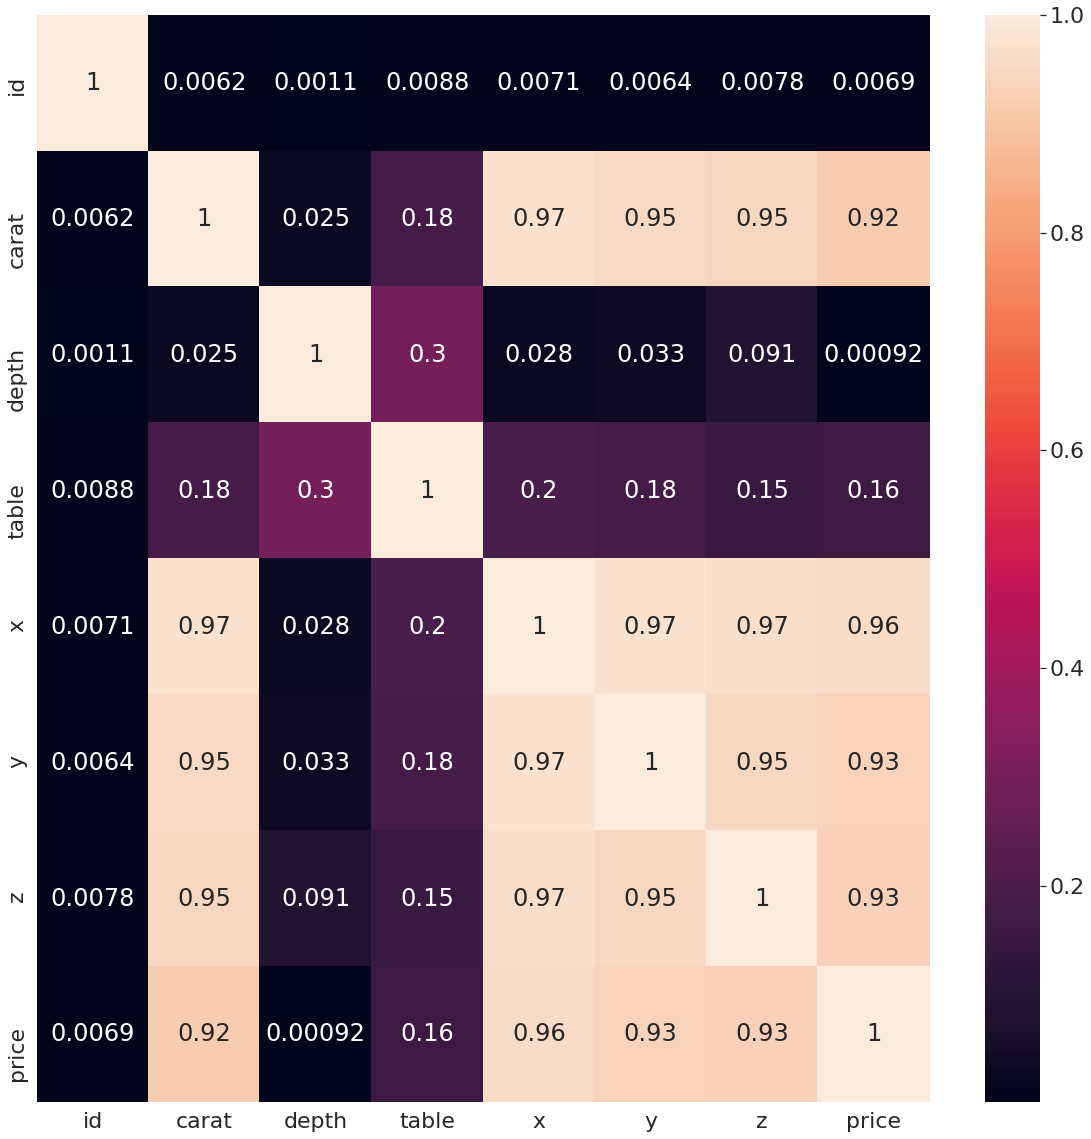

In [12]:
plt.figure(figsize = (20,20))
sns.set(font_scale = 2)
sns.heatmap(df.corr().abs(), annot = True)

### Categorical data

In this database we have three categorical variables. We are going to inspect them to see what they are like and see what is the best way to transform them to ordinals.

Categorical variables:
- cut 
- color    
- clarity  

In [13]:
df["cut"].unique()

array(['Premium', 'Very Good', 'Ideal', 'Good', 'Fair'], dtype=object)

In [14]:
df["color"].unique()

array(['F', 'E', 'G', 'D', 'J', 'I', 'H'], dtype=object)

In [15]:
df["clarity"].unique()

array(['VS2', 'SI2', 'SI1', 'VVS2', 'VS1', 'VVS1', 'IF', 'I1'],
      dtype=object)

As the three variables have few categories I will do a get dummies for each one of them

In [17]:
df_dummy = pd.get_dummies(df, columns = ["cut","color","clarity"], drop_first = True)

In [20]:
df_dummy.head()

id  carat  depth  table     x     y     z  price  cut_Good  cut_Ideal  ...  \
0   0   1.50   61.5   58.0  7.32  7.34  4.51  9.588         0          0  ...   
1   1   2.01   60.6   59.0  8.11  8.25  4.96  9.748         0          0  ...   
2   2   0.50   61.6   57.0  5.13  5.09  3.15  7.255         0          1  ...   
3   3   0.25   61.6   57.0  4.05  4.08  2.50  6.450         0          0  ...   
4   4   0.52   62.0   55.0  5.16  5.19  3.21  7.721         0          1  ...   

   color_H  color_I  color_J  clarity_IF  clarity_SI1  clarity_SI2  \
0        0        0        0           0            0            0   
1        0        0        0           0            0            1   
2        0        0        0           0            1            0   
3        0        0        0           0            0            0   
4        0        0        0           0            0            0   

   clarity_VS1  clarity_VS2  clarity_VVS1  clarity_VVS2  
0            0            1             0             0  
1            0            0             0             0  
2            0            0             0             0  
3            0            0             0             1  
4            0            1             0             0  

[5 rows x 25 columns]

In [19]:
df_dummy.to_csv("diamons_train.csv")